In [3]:
import os
import joblib
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("../tools/"))
from feature_format import featureFormat, targetFeatureSplit

In [4]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

In [5]:
data_dict

{'METTS MARK': {'salary': 365788,
  'to_messages': 807,
  'deferral_payments': 'NaN',
  'total_payments': 1061827,
  'loan_advances': 'NaN',
  'bonus': 600000,
  'email_address': 'mark.metts@enron.com',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': 'NaN',
  'total_stock_value': 585062,
  'expenses': 94299,
  'from_poi_to_this_person': 38,
  'exercised_stock_options': 'NaN',
  'from_messages': 29,
  'other': 1740,
  'from_this_person_to_poi': 1,
  'poi': False,
  'long_term_incentive': 'NaN',
  'shared_receipt_with_poi': 702,
  'restricted_stock': 585062,
  'director_fees': 'NaN'},
 'BAXTER JOHN C': {'salary': 267102,
  'to_messages': 'NaN',
  'deferral_payments': 1295738,
  'total_payments': 5634343,
  'loan_advances': 'NaN',
  'bonus': 1200000,
  'email_address': 'NaN',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': -1386055,
  'total_stock_value': 10623258,
  'expenses': 11200,
  'from_poi_to_this_person': 'NaN',
  'exercised_stock_options': 6680544,
  'from_

In [7]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

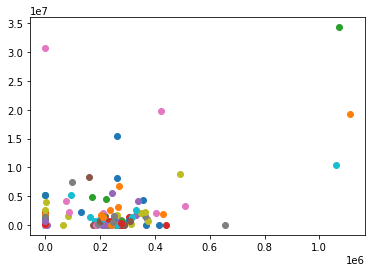

In [8]:
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [14]:
type(data)

numpy.ndarray

In [15]:
len(data)

124

In [18]:
from sklearn.cluster import KMeans

# Definisci il numero di cluster
k = 2  # Puoi modificare questo numero per esplorare diversi cluster

# Crea il modello K-means e addestralo
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)

# Etichette di cluster per ogni punto dati
pred = kmeans.labels_

# Centroidi dei cluster
centroids = kmeans.cluster_centers_

print("Etichette dei cluster:", pred)
print("Centroidi dei cluster:", centroids)

Etichette dei cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroidi dei cluster: [[1.17647059e-01 2.00320462e+05 1.50750164e+06]
 [8.00000000e-01 5.73218800e+05 2.39045580e+07]]


In [9]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

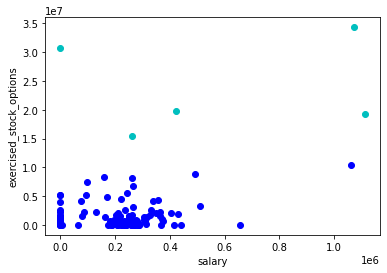

In [22]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")

In [28]:
data.shape

(124, 3)

In [32]:
import numpy as np

In [40]:
# Inizializziamo le variabili di massimo e minimo con valori estremi
max_exercised_stock_options = float('-inf')
min_exercised_stock_options = float('inf')

# Cicla su tutte le persone nel dizionario
for person, features in data_dict.items():
    exercised_stock = features.get("exercised_stock_options", "NaN")
    
    # Controlla che il valore non sia 'NaN'
    if exercised_stock != 'NaN':
        if exercised_stock > max_exercised_stock_options:
            max_exercised_stock_options = exercised_stock
        if exercised_stock < min_exercised_stock_options:
            min_exercised_stock_options = exercised_stock

print("Max exercised_stock_options:", max_exercised_stock_options)
print("Min exercised_stock_options:", min_exercised_stock_options)

Max exercised_stock_options: 34348384
Min exercised_stock_options: 3285


In [41]:
# Inizializziamo le variabili di massimo e minimo con valori estremi
max_exercised_stock_options = float('-inf')
min_exercised_stock_options = float('inf')

# Cicla su tutte le persone nel dizionario
for person, features in data_dict.items():
    exercised_stock = features.get("salary", "NaN")
    
    # Controlla che il valore non sia 'NaN'
    if exercised_stock != 'NaN':
        if exercised_stock > max_exercised_stock_options:
            max_exercised_stock_options = exercised_stock
        if exercised_stock < min_exercised_stock_options:
            min_exercised_stock_options = exercised_stock

print("Max salary:", max_exercised_stock_options)
print("Min salary:", min_exercised_stock_options)

Max salary: 1111258
Min salary: 477
